# COGS 108 - EDA Checkpoint

# Names

- Kevin Su
- Sujana Nagasuri
- Muskaan Bajaj
- Shenova Davis
- Jahnavi Handral

<a id='research_question'></a>
# Research Question

From beginning of 2018 to end of 2019, was there a statistically positive significant correlation between tourism in terms of the success of the  hospitality industry and its primary categories (travel & tourism, food & beverage, lodging, outdoor/recreation) and the overall health of the stock market determined by the S&P 500?

# Setup

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('S&Pdata.csv')
df2 = pd.read_csv('WaltDisneydata.csv')
df3 = pd.read_csv('Hiltondata.csv')
df4 = pd.read_csv('MarriotINTdata.csv')
df5 = pd.read_csv('MarriotVACdata.csv')
df6 = pd.read_csv('PepsiCodata.csv')
df7 = pd.read_csv('TYSONdata.csv')
df8 = pd.read_csv('Nestledata.csv')
df9 = pd.read_csv('IHGdata.csv')
df10 = pd.read_csv('EXPdata.csv')
df11 = pd.read_csv('BKNGdata.csv')
df12 = pd.read_csv('Hiltondata.csv')

In [3]:
df_a = pd.read_csv('S&Pdata2.csv')
df_b = pd.read_csv('WaltDisneydata2.csv')
df_c = pd.read_csv('Hiltondata2.csv')
df_d = pd.read_csv('MarriotINT2data.csv')
df_e = pd.read_csv('MarriotVACdata2.csv')
df_f = pd.read_csv('PepsiCodata2.csv')
df_g = pd.read_csv('TYSONdata2.csv')
df_h = pd.read_csv('Nestledata2.csv')
df_i = pd.read_csv('IHGdata2.csv')
df_j = pd.read_csv('EXPdata2.csv')
df_k = pd.read_csv('BKNGdata2.csv')
df_l = pd.read_csv('Hiltondata2.csv')

# Data Cleaning

Initially, to clean our 12 sets of data, we started by dropping columns we deemed unnessary from the dataframes. The S&P dataframe only had 3 columns to drop but the other 11 dataframes had 4 columns to drop. Then, after determining the types in the columns, we changed the types (objects) to floats. Then we combined all of the dataframes (minus the S&P one) into a singular dataframe where we had a column with the date and a column with the combined closing number (this included all of the 11 companies closing values added together for each date).

For further data cleaning involved with this checkpoint, we downloaded more CSV files which correlated with another year as we felt we needed more datasets to perform a good statistical analysis. Since Marketwatch only allowed us to download data for one year at a time, we had to combine these data frames and ensure that we did not repeat the indices to avoid confusion further into our data gathering process. Therefore we used the concat() function to join these two and set the ignore_index argument to be True to avoid repeating our indices. Then we proceeded to continue as we have with dropping our unnecessary columns so that we only have the date column and the close column. Then we converted the close type to float in order to use this with data in our data visualization. 

Then we created an additional dataframe with the combined closing rate of all of the companies within the hospitality industry that we were examining. For further analysis, we also created a dataframe which included the combine close rate and the individual close rate of each company for each date in a separate column. After converting the d types to the appropriate type, we proceeded to create another dataframe that included a column with the combined close rate for the hospitality industry companies and another columns with the S&P close rate. A third column in this dataframe was the ratio between these two columns. The last column within this dataframe was the realtive difference ratio between these two columns which helped us determine the rate of change between the two variables.  



In [4]:
df1 = pd.concat([df1, df_a], ignore_index=True)
df2 = pd.concat([df2, df_b], ignore_index=True)
df3 = pd.concat([df3, df_c], ignore_index=True)
df4 = pd.concat([df4, df_d], ignore_index=True)
df5 = pd.concat([df5, df_e], ignore_index=True)
df6 = pd.concat([df6, df_f], ignore_index=True)
df7 = pd.concat([df7, df_g], ignore_index=True)
df8 = pd.concat([df8, df_h], ignore_index=True)
df9 = pd.concat([df9, df_i], ignore_index=True)
df10 = pd.concat([df10, df_j], ignore_index=True)
df11 = pd.concat([df11, df_k], ignore_index=True)
df12 = pd.concat([df12, df_l], ignore_index=True)

In [5]:
# remove extra columns for S&P data
df_sp = df1.drop(columns=['Open','High','Low'])
df2 = df2.drop(columns=['Open','High','Low','Volume'])
df3 = df3.drop(columns=['Open','High','Low','Volume'])
df4 = df4.drop(columns=['Open','High','Low','Volume'])
df5 = df5.drop(columns=['Open','High','Low','Volume'])
df6 = df6.drop(columns=['Open','High','Low','Volume'])
df7 = df7.drop(columns=['Open','High','Low','Volume'])
df8 = df8.drop(columns=['Open','High','Low','Volume'])
df9 = df9.drop(columns=['Open','High','Low','Volume'])
df10 = df10.drop(columns=['Open','High','Low','Volume'])
df11 = df11.drop(columns=['Open','High','Low','Volume'])
df12 = df12.drop(columns=['Open','High','Low','Volume'])
df2.dtypes

Date      object
Close    float64
dtype: object

In [6]:
def stringToFloat (str_in):
    if ',' in str_in:
        str_in = str_in.replace(',', '')
        output = float(str_in)
    else:
        output = float(str_in)
        
    return output

In [7]:
df11["Close"] = df11["Close"].apply(stringToFloat)

In [8]:
df_companies = df2.copy()
df_companies = df_companies.drop(columns = "Close")
df_companies["Close"] = df2["Close"]+df3["Close"]+df4["Close"]+df5["Close"]+df6["Close"]+df7["Close"]+df8["Close"]+df9["Close"]+df10["Close"]
df_companies["Close"] = df_companies["Close"] + df11["Close"] + df12["Close"]
df_companies

,Date,Close
0,12/31/2018,2569.69
1,12/28/2018,2555.00
2,12/27/2018,2550.78
3,12/26/2018,2531.88
4,12/24/2018,2412.51
...,...,...
498,01/08/2019,2556.35
499,01/07/2019,2567.11
500,01/04/2019,2568.02
501,01/03/2019,2482.48


In [9]:
df_companies_full = df_companies.copy()
df_companies_full["Close2"] = df2["Close"]
df_companies_full["Close3"] = df3["Close"]
df_companies_full["Close4"]= df4["Close"]
df_companies_full["Close5"] = df5["Close"]
df_companies_full["Close6"] = df6["Close"]
df_companies_full["Close7"] = df7["Close"]
df_companies_full["Close8"] = df8["Close"]
df_companies_full["Close9"] = df9["Close"]
df_companies_full["Close10"] = df10["Close"]
df_companies_full

,Date,Close,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10
0,12/31/2018,2569.69,109.65,71.80,108.56,70.51,110.48,53.40,80.96,57.46,112.65
1,12/28/2018,2555.00,107.30,70.95,107.24,69.61,110.36,52.34,80.72,56.41,113.29
2,12/27/2018,2550.78,106.52,70.33,106.63,67.99,109.42,52.49,79.53,55.37,114.37
3,12/26/2018,2531.88,105.83,69.51,105.58,66.84,108.33,52.06,80.90,55.87,114.20
4,12/24/2018,2412.51,100.35,66.51,100.99,61.33,106.03,50.75,80.04,54.07,109.10
...,...,...,...,...,...,...,...,...,...,...,...
498,01/08/2019,2556.35,111.42,71.86,109.76,77.92,110.58,57.55,82.97,58.54,116.97
499,01/07/2019,2567.11,110.56,70.74,108.01,75.35,109.53,56.05,82.71,57.04,114.56
500,01/04/2019,2568.02,109.61,69.94,107.81,73.28,110.48,55.16,83.59,57.57,113.09
501,01/03/2019,2482.48,106.33,67.30,101.74,68.13,108.26,54.49,82.21,55.08,108.52


In [10]:
df_sp["Close"] = df_sp["Close"].apply(stringToFloat)

In [11]:
df_hp_sp500 = df_companies.copy()
df_hp_sp500['CloseSP'] = df_sp['Close']
df_hp_sp500.rename(columns={'Close':'CloseHP'}, inplace=True)
df_hp_sp500['Ratio'] = df_hp_sp500['CloseHP']/df_hp_sp500['CloseSP']
df_hp_sp500

,Date,CloseHP,CloseSP,Ratio
0,12/31/2018,2569.69,2506.85,1.025067
1,12/28/2018,2555.00,2485.74,1.027863
2,12/27/2018,2550.78,2488.83,1.024891
3,12/26/2018,2531.88,2467.70,1.026008
4,12/24/2018,2412.51,2351.10,1.026120
...,...,...,...,...
498,01/08/2019,2556.35,2574.41,0.992985
499,01/07/2019,2567.11,2549.69,1.006832
500,01/04/2019,2568.02,2531.94,1.014250
501,01/03/2019,2482.48,2447.89,1.014131


In [12]:
df_CloseHP1 = df_hp_sp500['CloseHP'].drop(index=0).reset_index(drop=True)
df_CloseHP2 = df_hp_sp500['CloseHP'].drop(index=502).reset_index(drop=True)
df_CloseHPdf = (df_CloseHP1-df_CloseHP2)/df_CloseHP1
df_CloseSP1 = df_hp_sp500['CloseSP'].drop(index=0).reset_index(drop=True)
df_CloseSP2 = df_hp_sp500['CloseSP'].drop(index=502).reset_index(drop=True)
df_CloseSPdf = (df_CloseSP1-df_CloseSP2)/df_CloseSP1
df_rel_diff = df_CloseHPdf/df_CloseSPdf
df_rel_diff


0      0.677015
1     -1.332528
2      0.871789
3      0.997697
4      0.442429
         ...   
497   -4.273582
498   -0.432321
499   -0.050547
500    1.003547
501    1.240743
Length: 502, dtype: float64

In [13]:
df_hp_sp500['Relative_Diff_Ratio'] = df_rel_diff
df_hp_sp500

,Date,CloseHP,CloseSP,Ratio,Relative_Diff_Ratio
0,12/31/2018,2569.69,2506.85,1.025067,0.677015
1,12/28/2018,2555.00,2485.74,1.027863,-1.332528
2,12/27/2018,2550.78,2488.83,1.024891,0.871789
3,12/26/2018,2531.88,2467.70,1.026008,0.997697
4,12/24/2018,2412.51,2351.10,1.026120,0.442429
...,...,...,...,...,...
498,01/08/2019,2556.35,2574.41,0.992985,-0.432321
499,01/07/2019,2567.11,2549.69,1.006832,-0.050547
500,01/04/2019,2568.02,2531.94,1.014250,1.003547
501,01/03/2019,2482.48,2447.89,1.014131,1.240743


# EDA

For our Exploratory Data Analysis, we started with determining the shapes of our two main datasets, the dataset containing the S&P data and the dataset containing the combined close rate for all of the companies in the hospitality industry that we were going to examine. 

After that, we used the describe() function to determine introductory statistics about the two variables we were trying to compare (the companies from the hospitality industry and the corresponding S&P values from that date). We specifically looked at the ratio column and the relative difference ratio from the dataset df_hp_sp500 above. These variables were helpful in allowing us to determine the relative size of the distribution and how the curve would look overall for the distribution of the two variables compared to each other. 

We then plotted a series of relevant figures that we used to analyze the relationship between our two variables S&P 500 close rate and the combined close rate from all the companies in the hospitality industry that we were looking at) in more detail. We go into specifics about each of these plots below under each of these distribution. 

In [14]:
df_sp.shape

(503, 2)

In [15]:
df_companies.shape

(503, 2)

In [16]:
df_hp_sp500['Ratio'].describe()

count    503.000000
mean       1.031680
std        0.057704
min        0.938364
25%        0.989821
50%        1.021248
75%        1.058759
max        1.180427
Name: Ratio, dtype: float64

In [17]:
df_hp_sp500['Relative_Diff_Ratio'].describe()

count    502.000000
mean       1.295498
std       29.092231
min     -553.386917
25%       -0.047833
50%        0.953382
75%        1.883161
max      158.650026
Name: Relative_Diff_Ratio, dtype: float64

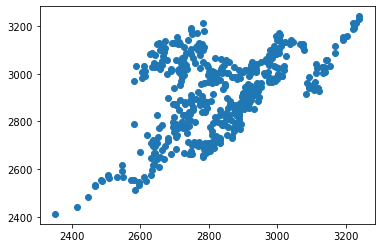

In [18]:
plt.scatter(df_sp['Close'],df_companies['Close'])

We graphed a scatter plot to look more specifically at the realtionship between the two variables (S&P 500 close rate and the combined close rate from all the companies in the hospitality industry that we were looking at). This scatter plot allowed us to determine if there was a correlation between the two variables which we determined there was definitely a positive correlation between. 

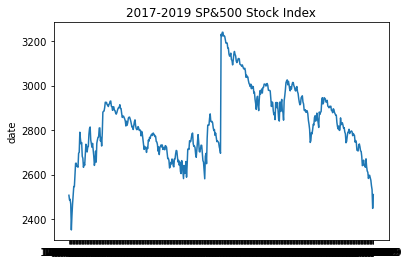

In [19]:
y_axis = df_sp['Close']
x_axis = df_sp['Date']

plt.plot(x_axis, y_axis)
plt.title('2017-2019 SP&500 Stock Index')
plt.ylabel('close price')
plt.ylabel('date')
plt.show()


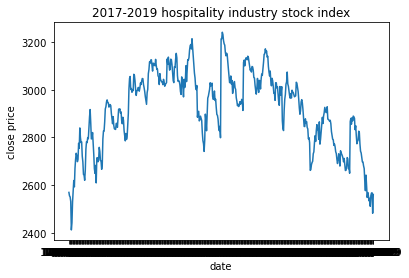

In [20]:
y_axis = df_companies['Close']
x_axis = df_companies['Date']

plt.plot(x_axis, y_axis)
plt.title('2017-2019 hospitality industry stock index')
plt.xlabel('date')
plt.ylabel('close price')
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Close'>

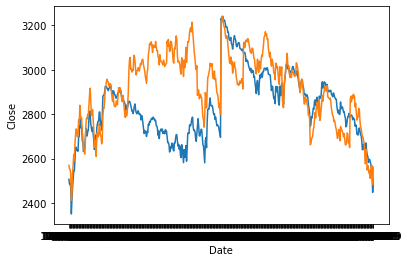

In [21]:
sns.lineplot(data=df_sp, x='Date',y='Close')
sns.lineplot(data=df_companies, x='Date',y='Close')

After that, we plotted a line graph to determine the close rate for S&P 500 over time and a separate line graph for the combined close of all of the companies from the hospitality industry. These graphs allowed us to see the realtive distribution of each but to get more specific information, we overaid the two graphs on top of each other in the same plot to see were they more closely correlated.

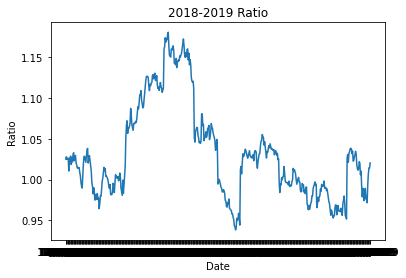

In [22]:
y_axis = df_hp_sp500['Ratio']
x_axis = df_hp_sp500['Date']

plt.plot(x_axis, y_axis)
plt.title('2018-2019 Ratio')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

We then plotted a line graph for the ratio between these two variables to show precisely how well these two variables correlated. If the line graph stayed constant around 1, we would have known that they two variables were closely correlated and thus had a strong positive relationship. Since this wasn't the case, we can assume that there are other facts which impacted S&P 500 at a time where it did not impact the hospitality industry. Although these factors are still no completely determined, we can assume that seasonal travelling (which impacts the hospitality industry but not S&P 500) could we one such factor.

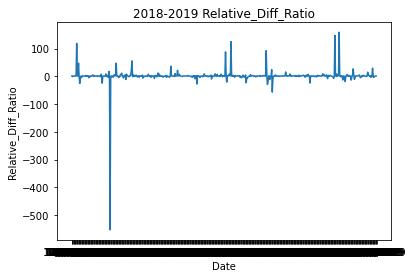

In [23]:
y_axis = df_hp_sp500['Relative_Diff_Ratio']
x_axis = df_hp_sp500['Date']

plt.plot(x_axis, y_axis)
plt.title('2018-2019 Relative_Diff_Ratio')
plt.xlabel('Date')
plt.ylabel('Relative_Diff_Ratio')
plt.show()

We plotted the relative difference ratio which measured the rate of change between the two variables. Based on this graph, we were clearly able to see where there were outliers in the dataset as they would cause huge spike in the graph. This made us conclude which outliers to remove and we went about the process of removing them.

In [24]:
index = df_hp_sp500.index[df_hp_sp500['Relative_Diff_Ratio'] > 50 ].tolist()
print(df_hp_sp500['Relative_Diff_Ratio'][index])

8      118.630959
99      55.547175
253     87.871780
262    124.793751
320     92.435902
433    147.312824
440    158.650026
Name: Relative_Diff_Ratio, dtype: float64


In [25]:
df_hp_sp500 = df_hp_sp500.drop(index)

In [26]:
index = df_hp_sp500.index[df_hp_sp500['Relative_Diff_Ratio'] < -50 ].tolist()
print(df_hp_sp500['Relative_Diff_Ratio'][index])

63    -553.386917
330    -56.993607
Name: Relative_Diff_Ratio, dtype: float64


In [27]:
df_hp_sp500 = df_hp_sp500.drop(index)

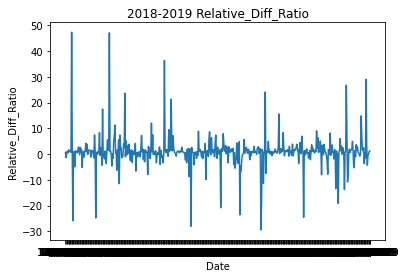

In [28]:
y_axis = df_hp_sp500['Relative_Diff_Ratio']
x_axis = df_hp_sp500['Date']

plt.plot(x_axis, y_axis)
plt.title('2018-2019 Relative_Diff_Ratio')
plt.xlabel('Date')
plt.ylabel('Relative_Diff_Ratio')
plt.show()

After removing the outliers, we see that this distribution is much more approachable and is a better representation of the comparision between the two variables. 

<AxesSubplot:xlabel='Relative_Diff_Ratio', ylabel='Count'>

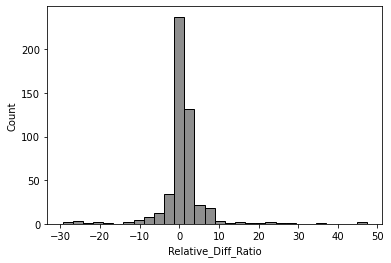

In [29]:
sns.histplot(df_hp_sp500['Relative_Diff_Ratio'],kde=False, bins=30, color="dimgrey")

This histogram shows the distribution of the relative difference ratio between the two variables. It also shows how this distribution is approximately normal is a bell shaped curve which you can tell by looking at the shape of the graph. 